In [1]:
#XGBOOST
#XGBOOST is a machine learning library which is used for both classification and regression problems.
#Overfitting is a common problem in machine learning, and XGBoost has built-in features to help prevent it.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [33]:
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [34]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [36]:
df=df.dropna(subset="winner")
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        14
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64

In [38]:
homes={}
keys=df['team1'].unique()
values=df['city'].unique()
for i in values:
    for j in keys:
        if str(i) in j:
            homes[j]=i
homes['Rajasthan Royals']='Jaipur'
homes['Kings XI Punjab']='Mohali'
homes['Gujarat Titans']='Ahmedabad'
homes
            

{'Royal Challengers Bangalore': 'Bangalore',
 'Delhi Daredevils': 'Delhi',
 'Delhi Capitals': 'Delhi',
 'Mumbai Indians': 'Mumbai',
 'Kolkata Knight Riders': 'Kolkata',
 'Sunrisers Hyderabad': 'Hyderabad',
 'Chennai Super Kings': 'Chennai',
 'Kochi Tuskers Kerala': 'Kochi',
 'Pune Warriors': 'Pune',
 'Rising Pune Supergiants': 'Pune',
 'Rising Pune Supergiant': 'Pune',
 'Royal Challengers Bengaluru': 'Bengaluru',
 'Lucknow Super Giants': 'Lucknow',
 'Rajasthan Royals': 'Jaipur',
 'Kings XI Punjab': 'Mohali',
 'Gujarat Titans': 'Ahmedabad'}

In [39]:
df['team1_home_city']=df['team1'].map(homes)
df['team2_home_city']=df['team2'].map(homes)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,team1_home_city,team2_home_city
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,Bangalore,Kolkata
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,Mohali,Chennai
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,Delhi,Jaipur
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,Mumbai,Bangalore
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,Kolkata,NaN


In [40]:
df['home_advantage_team1']=(df['team1_home_city']==df['city'])
df['home_advantage_team2']=(df['team2_home_city']==df['city'])
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,team1_home_city,team2_home_city,home_advantage_team1,home_advantage_team2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,Bangalore,Kolkata,True,False
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,N,NaN,MR Benson,SL Shastri,Mohali,Chennai,False,False
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,Delhi,Jaipur,True,False
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,N,NaN,SJ Davis,DJ Harper,Mumbai,Bangalore,True,False
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,111.0,20.0,N,NaN,BF Bowden,K Hariharan,Kolkata,NaN,True,False


In [41]:
X=df[['city','venue','team1','team2','toss_winner','toss_decision','target_runs','target_overs','home_advantage_team1','home_advantage_team2']]
Y=df['winner']
Y

0             Kolkata Knight Riders
1               Chennai Super Kings
2                  Delhi Daredevils
3       Royal Challengers Bangalore
4             Kolkata Knight Riders
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093            Sunrisers Hyderabad
1094          Kolkata Knight Riders
Name: winner, Length: 1090, dtype: object

In [46]:
for col in X.select_dtypes(include='object').columns:
    le=LabelEncoder()
    X[col]=le.fit_transform(X[col])
Y=LabelEncoder().fit_transform(Y)

In [47]:
X_train ,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [48]:
model= XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [49]:
model.fit(X_train_full, y_train_full, eval_set=[(X_val, y_val)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
print("Train accuracy score: ", accuracy_score(y_train_full, model.predict(X_train_full)))
print("Test accuracy score: ", accuracy_score(y_test, model.predict(X_test)))

Train accuracy score:  0.945480631276901
Test accuracy score:  0.591743119266055


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 125, 75],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.01, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [53]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy',n_jobs=-1, cv=3, verbose=2)
grid_search.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [100, 125, 75],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [54]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 75, 'subsample': 0.9}


In [55]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_full, y_train_full, eval_set=[(X_val, y_val)], verbose=False)

train_accuracy = accuracy_score(y_train_full, best_model.predict(X_train_full))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ", test_accuracy)

Train accuracy score:  0.9354375896700143
Test accuracy score:  0.6330275229357798


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

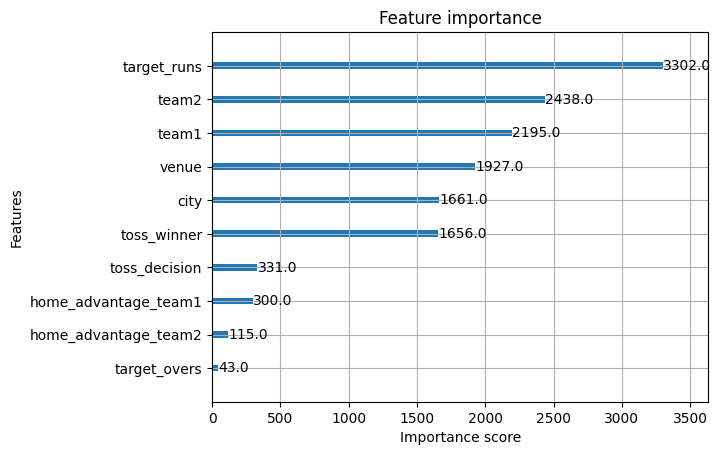

In [61]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(best_model)

In [62]:
import pickle 
with open('Match_prediction.pkl', 'wb') as file:
    pickle.dump(best_model, file)